
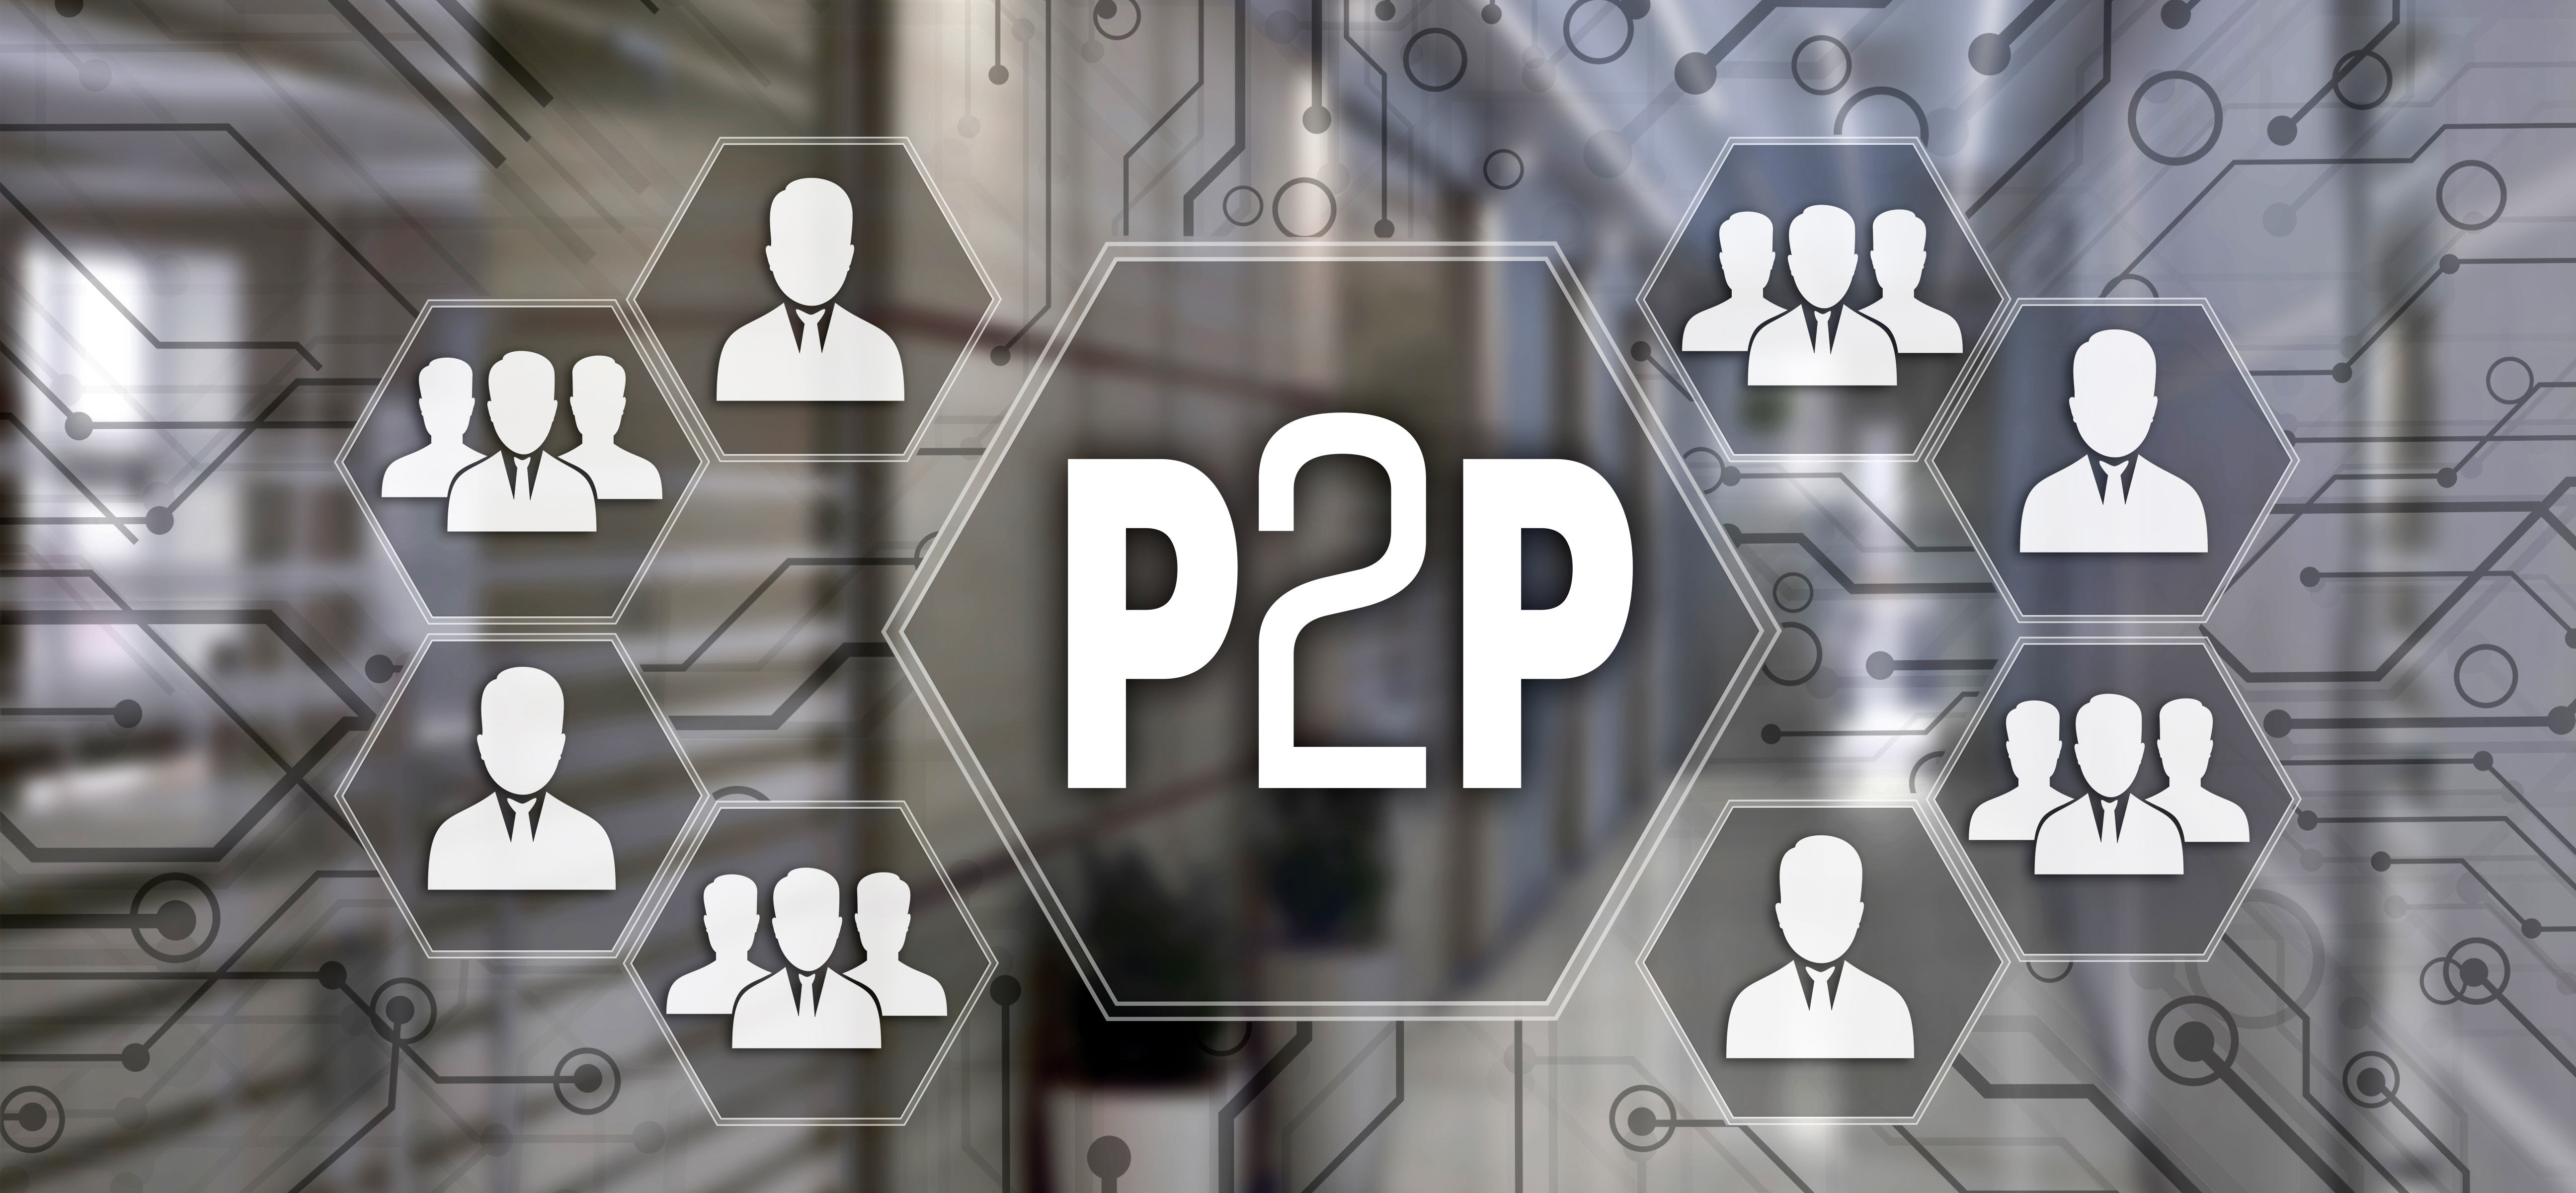



# Peer to Peer Lending Prediction

[Mendy Nemanow](https://www.linkedin.com/in/mendy-nemanow-2594ab225/)


## Overview 

---


For most of us, the first thing we heard about smart money habits is savings accounts. When you want to keep your money safe, give it to the bank to hold for you and you’ll earn interest on it every month. Banks are happy to give you interest on your deposits, because they use your money to give out loans to others and take interest from them. So when you deposit money in a bank, you are funding the loans of potential borrowers. And the interest you get back is a small cut of what the bank gets from the interest on the loan. This works for all parties and everybody’s happy. 

But over the last couple of decades, this deal has stopped working for depositors. Since the 2008 recession, interest rates have crashed. And over the past 2 years it’s gotten even worse. Add in the inflation and you see that putting money in a traditional banks savings account will actually cost you money.

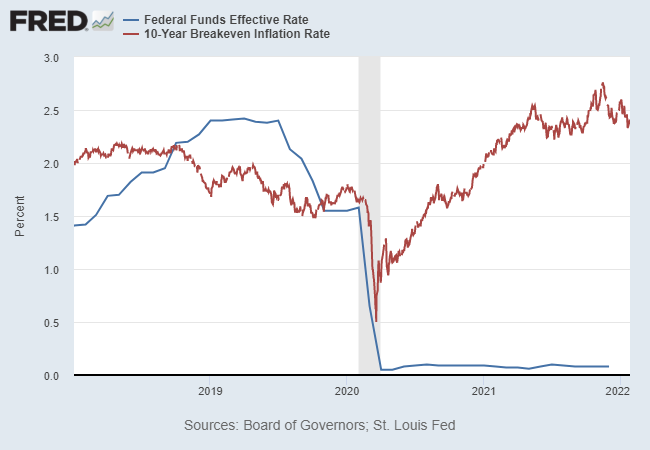

Enter “Peer to Peer Lending”. Introduced in 2005 in the UK, Peer-to-peer lending is a form of online lending that connects individual borrowers and lenders. One person will apply for a loan on any peer to peer platform and a few investors will combine to fund the loan. The process is usually much quicker for the borrower, than applying for a loan at the bank, and the lenders get to keep all the interest without the bank taking most of it.
 There is a lot of skepticism from traditional financial advisors on this form of lending for many different reasons, but it is becoming more mainstream. According to “verified market research.com”, this industry valuation is at about 85 million dollars and is expected to reach 578 million by 2028, with a “Compound Annual Growth Rate” of over 28 percent. 
Something that can offset the higher interest rates is that unlike your savings account, these investment are not insured, and if the borrower defaults on his payments, which does happen, you lose your money. That’s the risk/reward tradeoff.

Now what if you can create an algorithm to predict if a loan will default. Then you can reduce the rate of defaulted loans, and take full advantage of the high interest. This is what I tried to do.


## Data 

***

The loans I worked with are all loans from the [Lending Club](https://www.lendingclub.com/) platform. Lending club was one of the pioneers for this form of lending, and was one of the most popular. Since a year ago they changed their business and no longer handles P2P lending. 

I will be working with close to half a million loans from 2016 to 2018, that had over 150 features. I have already cleaned in the Cleaning and sampling notebook, and reduced the features down to 70. Check out that notebook for more details.  


# EDA

***


In [1]:
# necessary imports
import time
notebook_start = time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, plot_roc_curve, 
                             accuracy_score, recall_score, precision_score, f1_score)

In [2]:
# Insure that all columns are displayed 
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)

In [3]:
feat_def = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx')
df = pd.read_csv('../accepted_3_yrs.csv')
df

loan_amnt        term  int_rate  installment grade emp_length  \
0         30000.0   36 months     11.48       989.00     B   < 1 year   
1          8400.0   36 months      9.80       270.26     B  10+ years   
2         18000.0   36 months     12.88       605.46     C  10+ years   
3         35000.0   36 months     12.88      1177.27     C  10+ years   
4         25000.0   36 months     11.48       824.17     B  10+ years   
...           ...         ...       ...          ...   ...        ...   
482330     2500.0   36 months     11.31        82.22     B    5 years   
482331    15000.0   36 months      8.19       471.37     A    8 years   
482332     8000.0   36 months      8.81       253.70     A    5 years   
482333    11000.0   36 months      8.81       348.83     A     1 year   
482334     5000.0   36 months      7.56       155.67     A    5 years   

       home_ownership  annual_inc verification_status        date  \
0                RENT    150000.0     Source Verified  2016-01-01   
1                RENT     70000.0     Source Verified  2016-01-01   
2                 OWN     79000.0     Source Verified  2016-01-01   
3                 OWN    385000.0     Source Verified  2016-01-01   
4                RENT     80500.0     Source Verified  2016-01-01   
...               ...         ...                 ...         ...   
482330       MORTGAGE    125000.0     Source Verified  2018-12-01   
482331            OWN    245000.0        Not Verified  2018-12-01   
482332       MORTGAGE     55000.0        Not Verified  2018-12-01   
482333           RENT     70000.0        Not Verified  2018-12-01   
482334       MORTGAGE     98000.0        Not Verified  2018-12-01   

        loan_status zip_code    dti  delinq_2yrs  fico_range_low  \
0        Fully Paid    554xx  18.51          1.0           690.0   
1        Fully Paid    021xx   8.85          1.0           675.0   
2        Fully Paid    701xx  20.35          0.0           675.0   
3       Charged Off    787xx   9.95          0.0           690.0   
4       Charged Off    925xx  13.55          1.0           665.0   
...             ...      ...    ...          ...             ...   
482330   Fully Paid    120xx  10.72          0.0           715.0   
482331   Fully Paid    550xx   9.11          0.0           715.0   
482332   Fully Paid    559xx   0.55          0.0           775.0   
482333   Fully Paid    070xx  10.13          0.0           705.0   
482334   Fully Paid    775xx  14.78          0.0           690.0   

        fico_range_high  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0                 694.0             0.0      15.0      0.0    24960.0   
1                 679.0             0.0       9.0      0.0     5291.0   
2                 679.0             0.0      19.0      0.0    17592.0   
3                 694.0             2.0      14.0      1.0   390594.0   
4                 669.0             1.0      17.0      0.0    20711.0   
...                 ...             ...       ...      ...        ...   
482330            719.0             1.0      20.0      0.0    28231.0   
482331            719.0             1.0       9.0      0.0    78803.0   
482332            779.0             0.0       7.0      0.0      729.0   
482333            709.0             1.0       5.0      0.0    11483.0   
482334            694.0             0.0       6.0      0.0    10190.0   

        revol_util  total_acc  recoveries  collection_recovery_fee  \
0             51.8       38.0        0.00                   0.0000   
1             34.8       16.0        0.00                   0.0000   
2             60.5       26.0        0.00                   0.0000   
3             72.0       37.0        0.00                   0.0000   
4             39.7       24.0     1811.19                 326.0142   
...            ...        ...         ...                      ...   
482330        33.9       49.0        0.00                   0.0000   
482331        48.2       26.0        0.00       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482335 entries, 0 to 482334
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   482335 non-null  float64
 1   term                        482335 non-null  object 
 2   int_rate                    482335 non-null  float64
 3   installment                 482335 non-null  float64
 4   grade                       482335 non-null  object 
 5   emp_length                  482335 non-null  object 
 6   home_ownership              482335 non-null  object 
 7   annual_inc                  482335 non-null  float64
 8   verification_status         482335 non-null  object 
 9   date                        482335 non-null  object 
 10  loan_status                 482335 non-null  object 
 11  zip_code                    482335 non-null  object 
 12  dti                         482335 non-null  float64
 13  delinq_2yrs   

To explore the data, I'll take a look at how often loans go bad per value of each categorical feature. Then for the numerical features see how they are distributed with the loans get paid and the loans that default.

Firstly, I'll take a look at the charged off rate.

In [5]:
df.loan_status.value_counts(normalize=True)

Fully Paid     0.782081
Charged Off    0.217919
Name: loan_status, dtype: float64

Pretty heavy imbalance. I'll need to take that in to acount throughout the analysis.

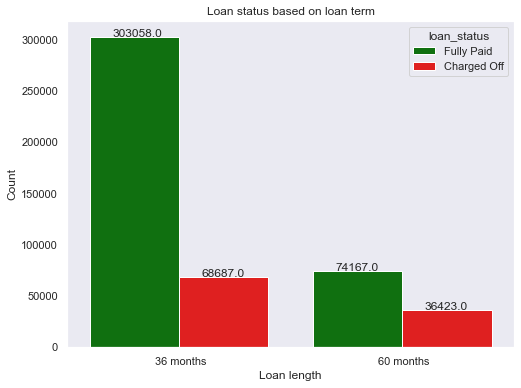

In [6]:
# check the number of defaulted loans per loan term
plt.figure(figsize=(8,6))
sns.set(style="dark")
ax = sns.countplot(x="term", data=df, hue='loan_status', palette=['green', 'red'])
plt.title('Loan status based on loan term')
plt.xlabel('Loan length')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

We see that longer loans tend to have more trouble getting paid. The reason might be that there is just more time for things to go wrong. Sticking with the shorter loans is the safer bet.

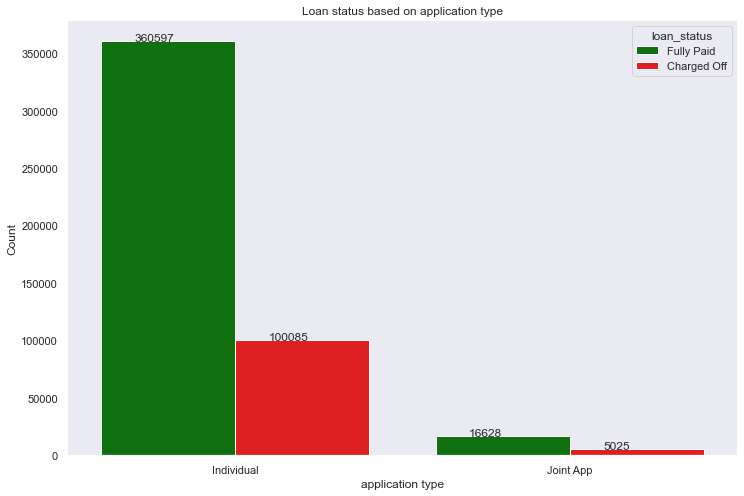

In [7]:
# check the number of defaulted loans per application type
plt.figure(figsize=(12,8))
ax = sns.countplot(x="application_type", data=df, hue='loan_status', palette=['green', 'red'])
plt.title('Loan status based on application type')
plt.xlabel('application type')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

There are a lot more individual loans than joint ones. However there doesn't seem to be much of a difference in the default rate.

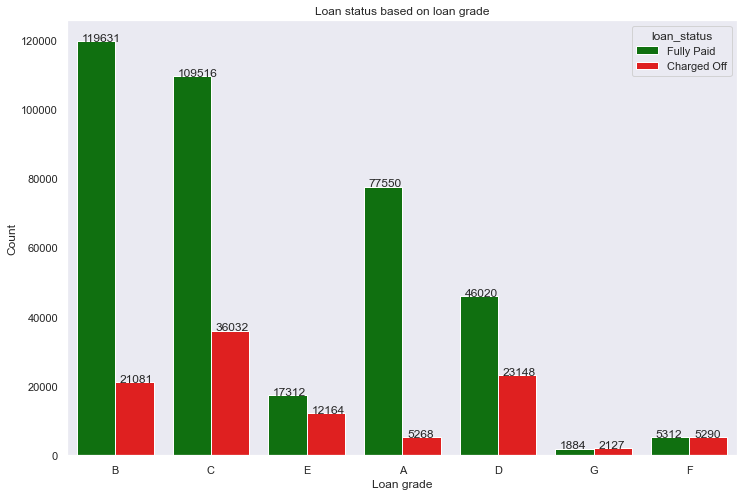

In [8]:
# check the number of defaulted loans per grade
plt.figure(figsize=(12,8))
ax = sns.countplot(x="grade", data=df, hue='loan_status', palette=['green', 'red'])
plt.title('Loan status based on loan grade')
plt.xlabel('Loan grade')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+50))

Grade is a score for how secure a loan is, and not surprisingly, the lower the grade, the the higher default rate. Notice that loans with grade "G" have more defaulted loans than paid loans!

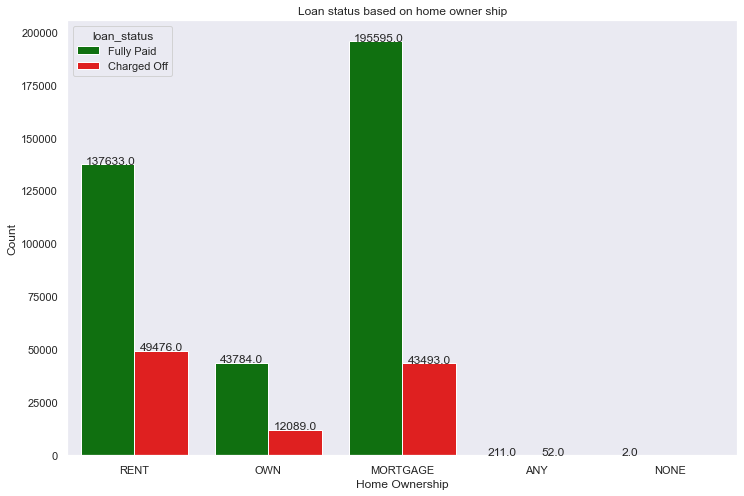

In [9]:
# check the number of defaulted loans per home_ownership
plt.figure(figsize=(12,8))
ax = sns.countplot(x="home_ownership", data=df, hue='loan_status', palette=['green', 'red'])
plt.title('Loan status based on home owner ship')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+50))

Again, home owenership type doesn't seem to have to much of an impact.

Now I'll take a look at the numerical values.

In [10]:
df.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  482335.000000  482335.000000  482335.000000  4.823350e+05   
mean    14673.928235      13.384789     450.128062  8.113732e+04   
std      9280.056585       5.305234     283.728560  7.887851e+04   
min      1000.000000       5.310000      30.120000  3.300000e+01   
25%      7500.000000       9.490000     241.220000  5.000000e+04   
50%     12000.000000      12.730000     374.920000  6.900000e+04   
75%     20000.000000      16.020000     605.585000  9.600000e+04   
max     40000.000000      30.990000    1719.830000  1.099920e+07   

                 dti    delinq_2yrs  fico_range_low  fico_range_high  \
count  482335.000000  482335.000000   482335.000000    482335.000000   
mean       18.514607       0.332808      697.837623       701.837802   
std        11.403998       0.916730       33.306220        33.307010   
min        -1.000000       0.000000      660.000000       664.000000   
25%        11.790000       0.000000      670.000000       674.000000   
50%        17.710000       0.000000      690.000000       694.000000   
75%        24.400000       0.000000      715.000000       719.000000   
max       999.000000      29.000000      845.000000       850.000000   

       inq_last_6mths       open_acc        pub_rec     revol_bal  \
count   482335.000000  482335.000000  482335.000000  4.823350e+05   
mean         0.588386      11.864824       0.239352  1.605810e+04   
std          0.871351       5.782887       0.628423  2.332027e+04   
min          0.000000       1.000000       0.000000  0.000000e+00   
25%          0.000000       8.000000       0.000000  5.511000e+03   
50%          0.000000      11.000000       0.000000  1.058200e+04   
75%          1.000000      15.000000       0.000000  1.904600e+04   
max          5.000000      88.000000      61.000000  1.696796e+06   

          revol_util      total_acc     recoveries  collection_recovery_fee  \
count  482335.000000  482335.000000  482335.000000             482335.00000   
mean       47.476088      24.711669     251.893057                 43.81262   
std        24.817947      12.259734     957.947434                169.00575   
min         0.000000       2.000000       0.000000                  0.00000   
25%        28.400000      16.000000       0.000000                  0.00000   
50%        46.700000      23.000000       0.000000                  0.00000   
75%        66.100000      31.000000       0.000000                  0.00000   
max       172.000000     176.000000   39859.550000               7174.71900   

       collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt   tot_cur_bal  \
count               482335.000000   482335.000000  4.823350e+05  4.823350e+05   
mean                     0.021885        0.005401  2.760685e+02  1.494160e+05   
std                      0.166684        0.078165  1.194563e+04  1.649928e+05   
min                      0.000000        0.000000  0.000000e+00  0.000000e+00   
25%                      0.000000        0.000000  0.000000e+00  3.147700e+04   
50%                      0.000000        0.000000  0.000000e+00  8.758800e+04   
75%                      0.000000        0.000000  0.000000e+00  2.227635e+05   
max                     12.000000        4.000000  6.214661e+06  5.445012e+06   

         open_acc_6m    open_act_il    open_il_12m    open_il_24m  \
count  482335.000000  482335.000000  482335.000000  482335.000000   
mean        1.049432       2.885447       0.787888       1.772685   
std         1.207095       3.042567       0.997206       1.690062   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       1.000000   
50%         1.000000       2.000000       1.000000       1.000000   
75%         2.000000       3.000000       1.000000       3.000000   
max        17.000000      57.000000      25.000000      51.000000   

       total_bal_il    open_rv_12m    open_rv_24m     max_bal_b

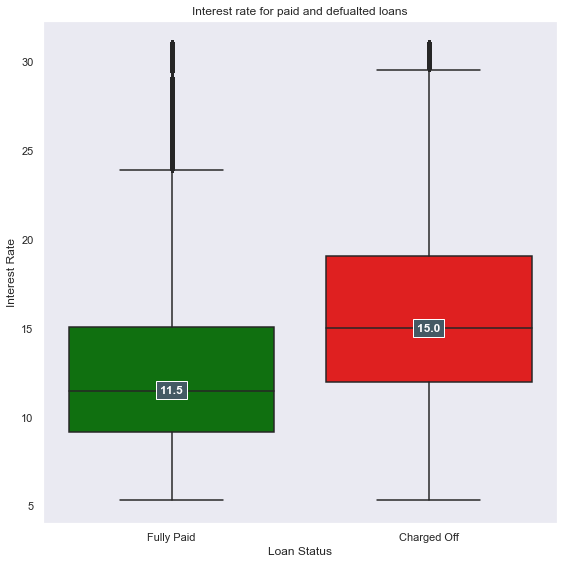

In [11]:
# a boxplot to show the distribution of interest rates on loans that were paid and defaulted.
box_plot = sns.boxplot(x="loan_status", y="int_rate", data=df, palette=['green', 'red'])
plt.gcf().set_size_inches(8, 8)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

plt.title('Interest rate for paid and defualted loans')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
box_plot.figure.tight_layout()

It's clear that the loans that charged off, usually had a much higher interest rate. This must be because the riskier loans are the ones that charge off more, and the riskier loans have higher interest rates.
Let's look at the interest rates by loan grade.

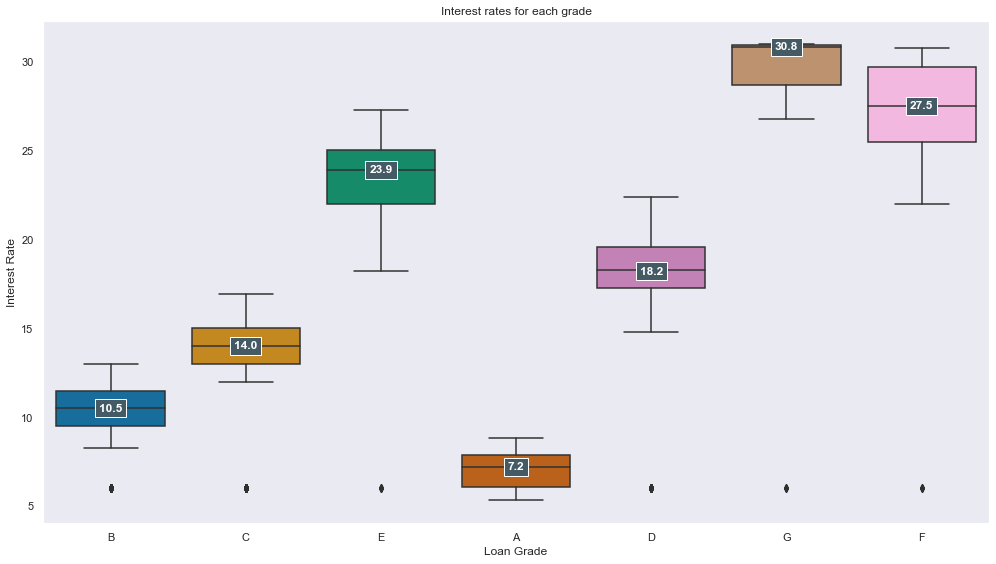

In [12]:
box_plot = sns.boxplot(x="grade", y="int_rate", data=df, palette='colorblind')
plt.gcf().set_size_inches(14, 8)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

plt.title('Interest rates for each grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
box_plot.figure.tight_layout()

Just as we thought, lower grade means higher interest.

This gives me an idea for potential value. What if we were able to predict, with reasonable success, which loans will default from the risky loans. In that case we'd be able to get the high interest on our investment without losing too much from the defaulted loans! I am going to shift my focus to that, and see how well I can predict these loans.

I still want to take a look at the other numerical variables.

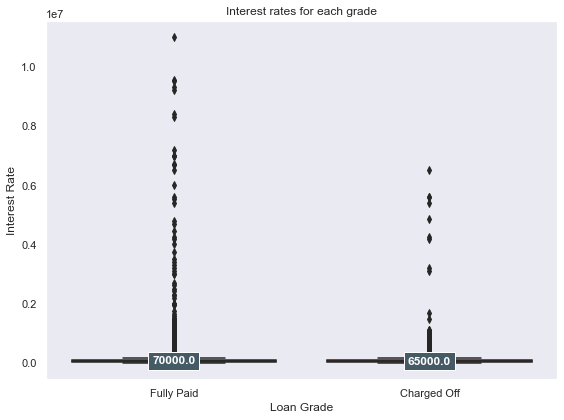

In [13]:
box_plot = sns.boxplot(x="loan_status", y='annual_inc', data=df, palette=['green', 'red'])
plt.gcf().set_size_inches(8, 6)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

plt.title('Interest rates for each grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
box_plot.figure.tight_layout()

Because of the outliers in income, the boxplots can't display the boxes normally. However you can see that the median incomes are not all that different. Does this mean that even people with high incomes have the same rates of defaulting? 

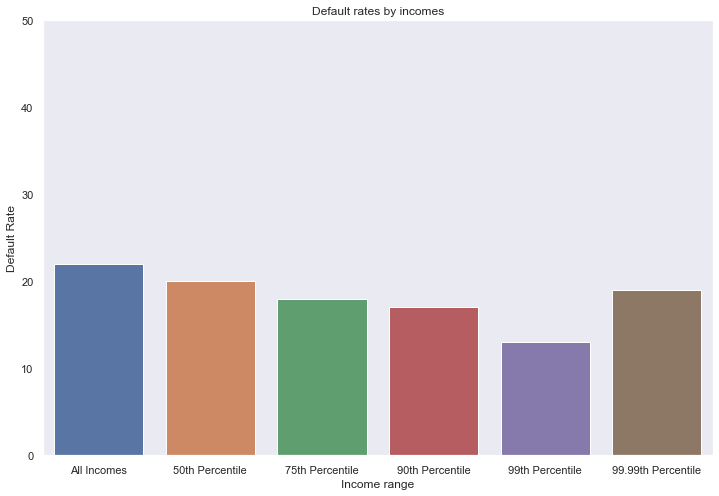

In [14]:
# get a list of default rate for each percentile
rates = [(round(df[df.annual_inc > 
                  np.percentile(df.annual_inc, i)]['loan_status'].value_counts(normalize=True)[1],2)*100)
        for i in [0, 50, 75, 90, 99, 99.99]]
labels = ['All Incomes', '50th Percentile', '75th Percentile', '90th Percentile', '99th Percentile', '99.99th Percentile']
plt.gcf().set_size_inches(12, 8)
ax = sns.barplot(x=labels, y=rates)
ax.set_ylim(0, 50)
plt.title('Default rates by incomes')
plt.xlabel('Income range')
plt.ylabel('Default Rate');

The rates do get better as the income gets higher, but I don't think the differences are too drastic, so I the interest rates are probably decided based on other features. (Notice that from the 99th percentile to the 99.99th percentile, the rate actually goes back up to the same as in the 75th! That is probably because the 99.99th percentile has very few loans total. So the sample size isn't enough to have a reliable rate.)

I'm guessing that the Debt to Income Ratio has the biggest effect on the interest rates.

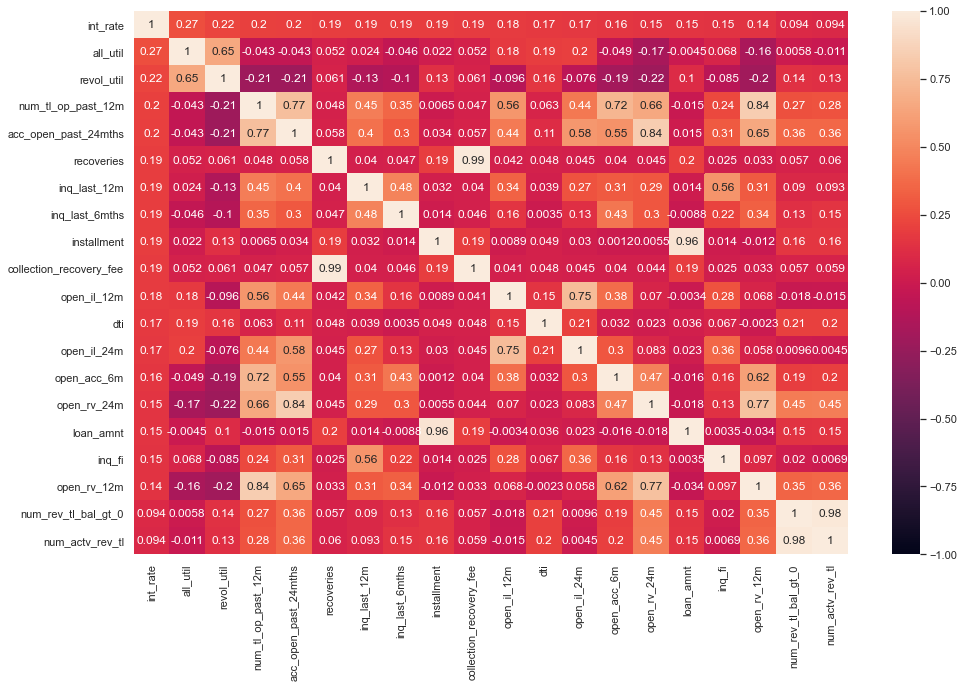

In [15]:
# get the numerical columns
num = df.select_dtypes(include='float64')
high_corr = list(num.corr()['int_rate'].sort_values(ascending=False)[:20].index)
high_corr_df = num[high_corr]
# plot a correlation heatmap of the top 10 correlated features with int_rate
plt.gcf().set_size_inches(16, 10)
sns.heatmap(high_corr_df.corr(), vmin=-1, vmax=1, annot=True);

It seems I was right about annual income not effecting the int_rate, it's not even in the to 20. But I was wrong about dti having the biggest effect on the interest rate. The biggest factor, at least from the continuous features is the "util" which is the balance to credit limit.

Let's see the effect the categorical varibles have on interest rate.

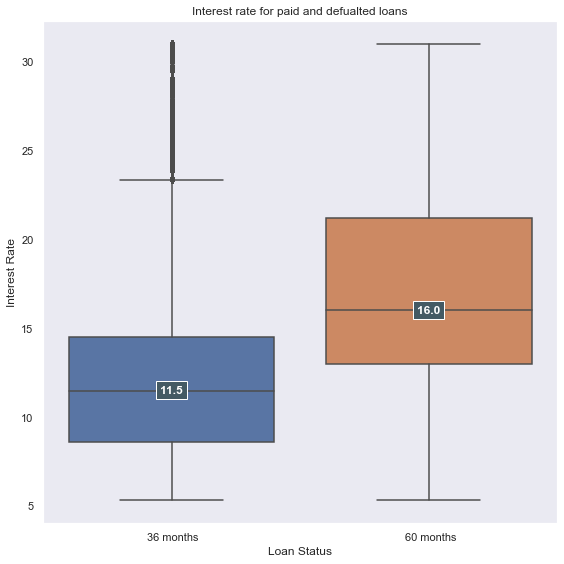

In [16]:
# a boxplot to show the distribution of interest rates on depending on the loan term.
box_plot = sns.boxplot(x="term", y="int_rate", data=df)#, palette=['green', 'red'])
plt.gcf().set_size_inches(8, 8)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

plt.title('Interest rate for paid and defualted loans')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
box_plot.figure.tight_layout()

We saw earlier that the longer terms have higher default rates, it's right to charge higher interest.

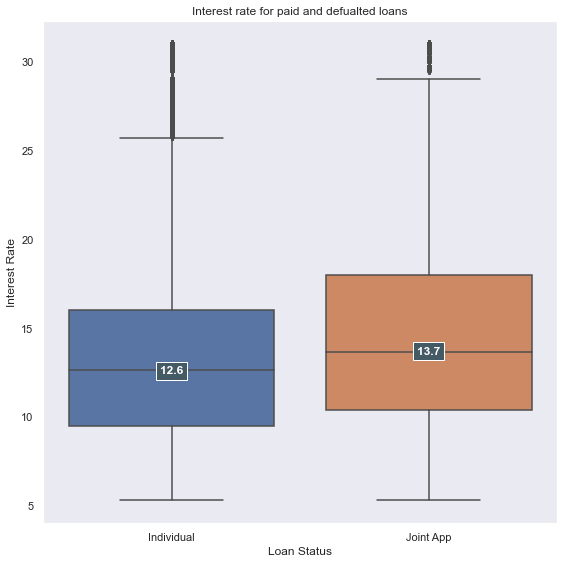

In [17]:
# a boxplot to show the distribution of interest rates on depending on application type.
box_plot = sns.boxplot(x="application_type", y="int_rate", data=df)#, palette=['green', 'red'])
plt.gcf().set_size_inches(8, 8)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#445A64'))

plt.title('Interest rate for paid and defualted loans')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
box_plot.figure.tight_layout()

Not much of a difference there. 

The biggest takeaway from this is that besides just trying to predict whether the loans will predict overall loans, the best value would be if I can predict the risky loans. 

# Modeling

To train the model I need to figure out which features to use. I'll start off with using just a few of the most fundemantal features on loan applications. e.g. annual income, credit score, loan grade. Afterwards I will work from the other way, using all the features, but run them through a PCA to reduce the dimensionality. 

But there's pre-processing that needs to be done first.

### Pre-processing

The first step is to make all the categorical variables into numerical form. I can use OneHotEncoding, but I prefer to manually label each value with number since these categories are ordinal.

In [18]:
# replace every value of type object with a integer so that it's usable for the model.
df.term.replace((' 36 months', ' 60 months'),(0 ,1), inplace = True) 

df.emp_length.replace(('10+ years','9 years', '8 years', '7 years', '6 years','5 years', '4 years','3 years',
                         '2 years','1 year','< 1 year'),(11,10,9,8,7,6,5,4,3,2,1), inplace  = True)

df.home_ownership.replace(('OWN', 'MORTGAGE', 'RENT','ANY', 'OTHER','NONE'),(6,5,4,3,2,1), inplace = True)

df.verification_status.replace(('Source Verified', 'Verified','Not Verified'),(3,2,1), inplace = True)

df.loan_status.replace(('Fully Paid', 'Charged Off'),(1,0), inplace = True) 

df.application_type.replace(('Individual','Joint App'),(1,2), inplace  = True)

df.grade.replace(('A','B','C','D','E','F','G'), (7,6,5,4,3,2,1), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482335 entries, 0 to 482334
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   482335 non-null  float64
 1   term                        482335 non-null  int64  
 2   int_rate                    482335 non-null  float64
 3   installment                 482335 non-null  float64
 4   grade                       482335 non-null  int64  
 5   emp_length                  482335 non-null  int64  
 6   home_ownership              482335 non-null  int64  
 7   annual_inc                  482335 non-null  float64
 8   verification_status         482335 non-null  int64  
 9   date                        482335 non-null  object 
 10  loan_status                 482335 non-null  int64  
 11  zip_code                    482335 non-null  object 
 12  dti                         482335 non-null  float64
 13  delinq_2yrs   

Every feature is now numeric besides for data and zipcode which I will not be using to train on.

The next step is to Scale all the numeric data. But I need to make the train test split before so that there is no leakage.

In [19]:
# get a list of basic columns to train on 
basic_feat = ['annual_inc', 'loan_amnt', 'int_rate', 'grade', 'dti', 'term', 'emp_length', 'home_ownership']
# split the data into a training set and testing set.
X = df[basic_feat].copy()
y = df['loan_status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [20]:
# instantiate scaler, fit and transform the X_train and X_test
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


### Baseline

I'll start with a dummy model, and then a simple model just to compare against.

0.660433166093074


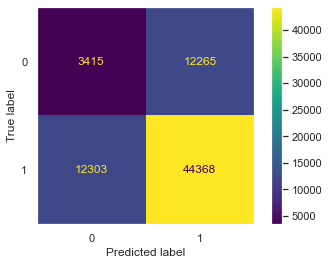

In [21]:
dummy = DummyClassifier(strategy="stratified", random_state=0)
dummy.fit(X_train_sc, y_train)
plot_confusion_matrix(dummy, X_test_sc, y_test)
dummy_accuracy = dummy.score(X_test_sc, y_test)
print(dummy_accuracy)

Training accuracy of Logistic Regression is: 78.34
Accuracy of Logistic Regression is: 78.44
Precision of Logistic Regression is: 79.51


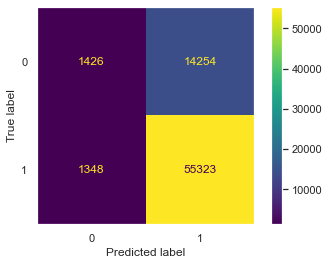

In [22]:
# Instantiate a logistic regression then fit it on X_train and get the scoring metrics witha confusion matrix
lr=LogisticRegression(random_state=0)
lr.fit(X_train_sc,y_train)
train_pred = lr.predict(X_train_sc)
lr_pred = lr.predict(X_test_sc)
train_accuracy = accuracy_score(y_train, train_pred)*100
lr_accuracy= accuracy_score(y_test, lr_pred)*100
lr_precision = precision_score(y_test, lr_pred)*100
print('Training accuracy of Logistic Regression is: {:.2f}'.format(train_accuracy))
print('Accuracy of Logistic Regression is: {:.2f}'.format(lr_accuracy))
print('Precision of Logistic Regression is: {:.2f}'.format(lr_precision))
plot_confusion_matrix(lr, X_test_sc, y_test);

80% on predictions sounds pretty good, but we need to remember the actual default rate is about 20%, so 80% accuracy doesn't move the needle. We are looking to be better than the actual rate so we can reduce the natural risk of investing in each loan.

Now that we have what to compare with, I'll run three different algorithms with a grid search to get the best results in each one. Because I'm going to do this with multiple subsets of the data, I'll make a function for the grid search.

In [23]:
# function for the grid search on logistic regression 
def logreg(X_train, X_test, y_train, y_test, cv=3):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'max_iter': [2000, 3000],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [{0:2, 1:1}, {0:1, 1:1}, {0:1, 1:3}, {0:1, 1:4}]
    }
    
    # Instantiate & fit LogReg model for GridSearch
    grid_logreg = LogisticRegression(random_state=42)
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_logreg, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    # print out the best parameters
    params = gs.best_params_
    print(f"Best class_weight: {params['class_weight']}, Best 'C': {params['C']}, Best 'max_iter': {params['max_iter']}")
    # instantiate new logistic regression with these parameters
    lr = LogisticRegression(max_iter=params['max_iter'], C=params['C'],
                            class_weight=params['class_weight'],random_state=42 )
    print('')
    # print the training accuracy
    lr.fit(X_train, y_train)
    train_pred = lr.predict(X_train)
    print('Training accuracy:', round(accuracy_score(y_train, train_pred), 4)*100)
    # Run cross-validation using the new logistic regression and print the accuracy 
    cv_results = cross_val_score(lr, X_train, y_train, cv=cv)
    print("Mean Cross-Validation accuracy:", round(cv_results.mean(),4)*100)
    # print the test accuracy score
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Testing accuracy:', round(accuracy, 4)*100)
    # Plot Confusion Matrix
    plot_confusion_matrix(lr, X_test, y_test)
    # Plot an ROC curve (only works with binary data)
    return lr, accuracy

In [24]:
# function for the grid search on KNearest Neighbors 
def knn(X_train, X_test, y_train, y_test, cv=3):
    
    # Set GridSearchCV hyperparameters to compare & select
    param_grid = {
    'n_neighbors': [3,5,9,13],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']
    }
    
    # Instantiate & fit LogReg model for GridSearch
    grid_knn = KNeighborsClassifier()
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_knn, param_grid=param_grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    # print out the best parameters
    params = gs.best_params_
    print(f"Best 'n_neighbors': {params['n_neighbors']}, Best 'metric': {params['metric']},\
          Best 'weights': {params['weights']}")
    print('')
    # instantiate new logistic regression with these parameters
    knn = KNeighborsClassifier(n_neighbors=params['n_neighbors'], metric=params['metric'],
                            weights=params['weights'])
    # print the training score
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    print('Training accuracy:', round(accuracy_score(y_train, train_pred), 4)*100)
    # Run cross-validation using the new knn and print the accuracy
    cv_results = cross_val_score(knn, X_train, y_train, cv=cv)
    print("Mean Cross-Validation accuracy:", round(cv_results.mean(), 4)*100)
    # print testing accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Testing accuracy:', round(accuracy, 4)*100)
    # Plot Confusion Matrix
    plot_confusion_matrix(knn, X_test, y_test)
    return knn, accuracy

In [25]:
# make a function for the grid search on random forest to avoid repetitiveness 
def random_forest(X_train, X_test, y_train, y_test, cv=3):
    
    # Set GridSearchCV hyperparameters to compare & select
    param_grid = {
    'n_estimators': [100, 125, 150],
    'max_depth':  [15, 25],
    'min_samples_split': [2, 5]
     }
    # Instantiate & fit LogReg model for GridSearch
    grid_rf = RandomForestClassifier(random_state=42)
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=param_grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    # print out the best parameters
    params = gs.best_params_
    print(f"Best 'n_estimators': {params['n_estimators']}, Best 'max_depth': {params['max_depth']},\
                       Best 'min_samples_split': {params['min_samples_split']}")
    print('')
    # instantiate new logistic regression with these parameters
    rf = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], 
                                min_samples_split=params['min_samples_split'], random_state=42 )
    # print the training score
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    print('Training accuracy:', round(accuracy_score(y_train, train_pred), 4)*100)
    # Run cross-validation using the new Random forest
    cv_results = cross_val_score(rf, X_train, y_train, cv=cv)
    print("Mean Cross-Validation accuracy:", round(cv_results.mean(), 4)*100)
    # print testing accuracy
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Testing accuracy:', round(accuracy, 4)*100)
    # Plot Confusion Matrix
    plot_confusion_matrix(rf, X_test, y_test)
    return rf, accuracy

Best class_weight: {0: 1, 1: 1}, Best 'C': 0.01, Best 'max_iter': 2000

Training accuracy: 78.34
Mean Cross-Validation accuracy: 78.34
Testing accuracy: 78.44

(This cell takes over 0 minutes to run)


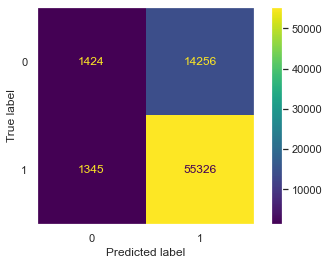

In [26]:
cell_start = time.time()
lr_basic, lr_basic_accuracy = logreg(X_train_sc, X_test_sc, y_train, y_test)
print("")
print(f'(This cell takes over {int((time.time() - cell_start)/60)} minutes to run)')

Best 'n_neighbors': 13, Best 'metric': minkowski,          Best 'weights': uniform

Training accuracy: 79.54
Mean Cross-Validation accuracy: 77.34
Testing accuracy: 77.36

(This cell takes over 20 minutes to run)


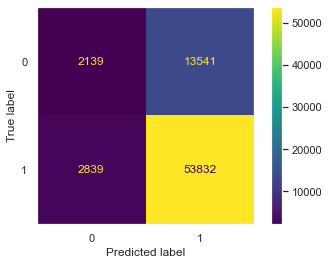

In [28]:
cell_start = time.time()
knn_basic, knn_basic_accuracy = knn(X_train_sc, X_test_sc, y_train, y_test)
print("")
print(f'(This cell takes over {int((time.time() - cell_start)/60)} minutes to run)')

Best 'n_estimators': 125, Best 'max_depth': 15,                       Best 'min_samples_split': 5

Training accuracy: 80.78
Mean Cross-Validation accuracy: 78.44
Testing accuracy: 78.68

(This cell takes over 26 minutes to run)


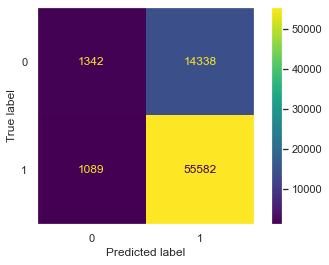

In [29]:
cell_start = time.time()
rf_basic, rf_basic_accuracy = random_forest(X_train_sc, X_test_sc, y_train, y_test)
print("")
print(f'(This cell takes over {int((time.time() - cell_start)/60)} minutes to run)')

The results from the grid searches are not any better than the default settings from logistic regression. This is a bit disappointing, but we still have hope trying with all the features.

In [30]:
# Make another train test split using all the features, besides date and zipcode
X = df.drop(['loan_status', 'date', 'zip_code'], axis=1).copy()
y = df['loan_status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [31]:
# scale the new X_train and X_test
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
# run a pca to reduce the features and remove multicollinearity
pca = PCA(.95)
pca.fit(X_train_sc)
pca_X_train = pca.transform(X_train_sc)
pca_X_test = pca.transform(X_test_sc)

In [33]:
pca_X_train.shape

(409984, 39)

Since the results were the same for all the algorithms, I'll just run the Logistic regression for the rest.

Best class_weight: {0: 1, 1: 3}, Best 'C': 10, Best 'max_iter': 2000

Training accuracy: 91.03999999999999
Mean Cross-Validation accuracy: 91.03
Testing accuracy: 91.13

(This cell takes over 3 minutes to run)


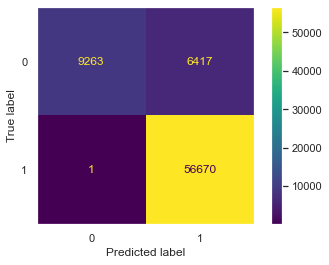

In [34]:
cell_start = time.time()
lr_complex, lr_complex_accuracy = logreg(pca_X_train, pca_X_test, y_train, y_test)
print("")
print(f'(This cell takes over {int((time.time() - cell_start)/60)} minutes to run)')

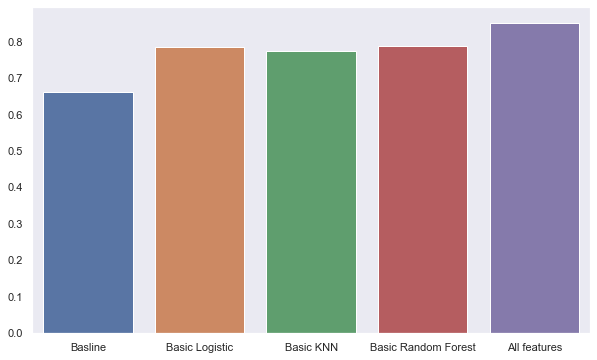

In [43]:
model_names = ['Basline', 'Basic Logistic', 'Basic KNN', 'Basic Random Forest', 'All features']
accuracies = [dummy_accuracy, lr_basic_accuracy, knn_basic_accuracy, rf_basic_accuracy, lr_complex_accuracy]
sns.set_theme(style="dark")
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies);

91% for the accuracy Is pretty good! More importantly the precision is almost as good at 89%. This means that when the model thinks that a loan will be paid back, it is correct 90% of the time!

In [36]:
bad_df = df[df.grade.isin([4, 3, 2, 1])].copy()
print(bad_df['int_rate'].mean())
bad_df.loan_status.value_counts(normalize=True)

21.032285245062113


1    0.622725
0    0.377275
Name: loan_status, dtype: float64

In [37]:
X = bad_df.drop(['loan_status', 'date', 'zip_code'], axis=1).copy()
y = bad_df['loan_status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [38]:
# scale the new X_train and X_test
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [39]:
# run a pca to reduce the features and remove multicollinearity
pca = PCA(.95)
pca.fit(X_train_sc)
pca_X_train = pca.transform(X_train_sc)
pca_X_test = pca.transform(X_test_sc)

Best class_weight: {0: 1, 1: 1}, Best 'C': 10, Best 'max_iter': 2000

Training accuracy: 84.87
Mean Cross-Validation accuracy: 84.86
Testing accuracy: 85.18

(This cell takes over 0 minutes to run)


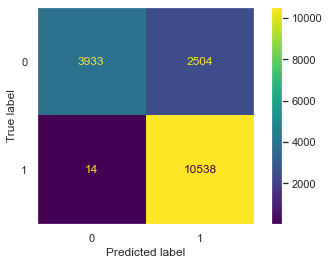

In [40]:
cell_start = time.time()
lr_complex, lr_complex_accuracy = logreg(pca_X_train, pca_X_test, y_train, y_test)
print("")
print(f'(This cell takes over {int((time.time() - cell_start)/60)} minutes to run)')

Precision score of 80% is not as good as the on the rest of the loans, but still very valuable considering the high interest rate.


## Next steps

* Because lending club has changed their business and no longer is a P2P platform, I need to test this model on some other platforms loan applications.
* I need to get more current data, as the loans I was working with up to 2018.


In [ ]:
notebook_end = time.time()
print(f'This notebook takes {int((notebook_end - notebook_start)/60)} minutes to run')